In [1]:
%matplotlib notebook
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

### Функции

In [2]:
def ackley(x, y):
    return -20*np.exp(-0.2*np.sqrt(0.5*(x**2+y**2))) \
            - np.exp(0.5*(np.cos(2*x*math.pi)+np.cos(2*y*math.pi))) + math.e + 20


def himel(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 -7)**2


def holder(x, y):
    return -abs(np.sin(x)*np.cos(y)*np.exp(abs(1-(np.sqrt(x**2+y**2))/(math.pi))))


def crossInTray(x, y):
    return -0.0001*(abs(np.sin(x)*np.sin(y)*np.exp(abs(100-(x**2+y**2)/(math.pi))))+1)**0.1

### Алгоритм роя частиц

In [3]:
class PSO:
    
    def __init__(self, func, area = (-5, 5), particles = 20, itr = 100, w = 1, fp = 1, fg = 1):
        
        self.w = w             # Коэффициент инерции
        self.fp = fp           # Коэффициент ускорения
        self.fg = fg           # Коэффициент ускорения
        self.itr = itr         # Количество итераций
        self.func = func       # Оптимизируемая функция
        self.area = area       # Область определения
        self.partQ = particles # Количество частиц
        
        self.particles = np.random.uniform(area[0], area[1], (self.partQ, 2)) # Координаты частиц
        
        self.particlesBest = self.particles.copy() # Координаты частиц
        
        self.swarmBest = list(area) # Лучшая позиция
                
        self.velocity = np.random.uniform(-abs(area[1] - area[0]), abs(area[1] - area[0]), (self.partQ, 2)) # Векторы ускорений
        print(self.velocity)
        self.particlesHist = [self.particles.copy(), ] # Позиции чаcтиц на каждой итерации
        self.swarmBestHist = [] # Лучшая текущая позиция для каждой итерации
        
    
    def execute(self):
        
        for i in range(itr):
            for pI, partical in enumerate(self.particles):
                for d in range(2):
                    
                    # Получение рандомных значений
                    rp, rg = np.random.uniform(0, 1, 2)
                    
                    # Изменение укорения
                    self.velocity[pI][d] = self.w*self.velocity[pI][d] \
                        + self.fp*rp*(self.particlesBest[pI][d]-partical[d]) \
                        + self.fg*rg*(self.swarmBest[d]-partical[d])
                    
                    # Изменение координаты частицы
                    partical[d] += self.velocity[pI][d]
                    
                    # Проверка нахождения частицы в пределах исследуемой области
                    if partical[d] > self.area[1]:
                        partical[d] = self.area[1]
                    elif partical[d] < self.area[0]:
                        partical[d] = self.area[0]
                
                # Обновление лучшего положения для каждой частицы
                if self.func(*partical) < self.func(*self.particlesBest[pI]):
                    self.particlesBest[pI] = partical
                    
                    # Обновление лучшего положения
                    if self.func(*self.particlesBest[pI]) < self.func(*self.swarmBest):
                        self.swarmBest = self.particlesBest[pI]
            
            # Добавление нового положения частиц и текущего лучшего положения
            self.particlesHist.append(self.particles.copy())
            self.swarmBestHist.append(self.swarmBest.copy())

### Функция Экли

[[-4.42995721  2.68852944]
 [ 5.77165409 -5.01070243]
 [-4.95903334 -2.7270001 ]
 [ 6.0354663   1.6082329 ]
 [-4.4021453  -2.66815545]
 [ 0.4098839  -7.25655197]
 [-0.58809389 -6.25615601]
 [ 8.41878963 -0.34779658]
 [ 8.28412853  5.71039257]
 [-9.60075474 -9.834693  ]
 [-3.01806053 -4.09011349]
 [ 2.90026965  6.3098812 ]
 [-5.29364018  8.62830494]
 [ 8.57055713  0.43775928]
 [-9.56086327 -3.9065216 ]
 [ 6.53969038 -2.94596262]
 [ 4.55708803 -7.94902963]
 [ 1.27541899  1.96248745]
 [ 4.45729501 -7.30208264]
 [-6.44307343  2.05657416]]
Минимум функции: 0.0
Найденный минимум: 0.0


<IPython.core.display.Javascript object>


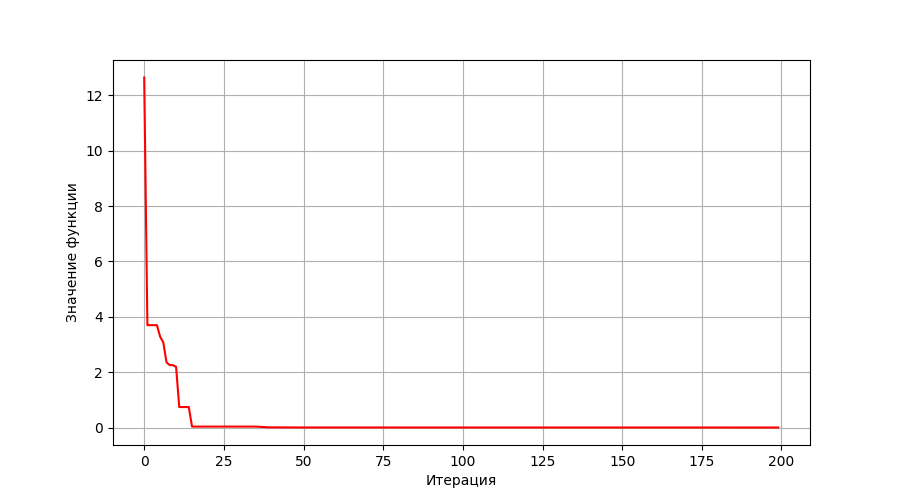

In [4]:
func = ackley
area = (-5, 5)
particles = 20
itr = 200
w = 0.6
fp = 2
fg = 2

pso = PSO(func, area, particles, itr, w, fp, fg)
pso.execute()

particles = [list(map(lambda x: list(x), parts)) for parts in pso.particlesHist]
bests = [func(*best) for best in pso.swarmBestHist]
best = pso.swarmBest

print(f'Минимум функции: 0.0\nНайденный минимум: {round(func(*best), 9)}')

fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot()

ax.plot(bests, color='red', linewidth=1.5)
ax.set_xlabel('Итерация')
ax.set_ylabel('Значение функции')
ax.grid()

<IPython.core.display.Javascript object>


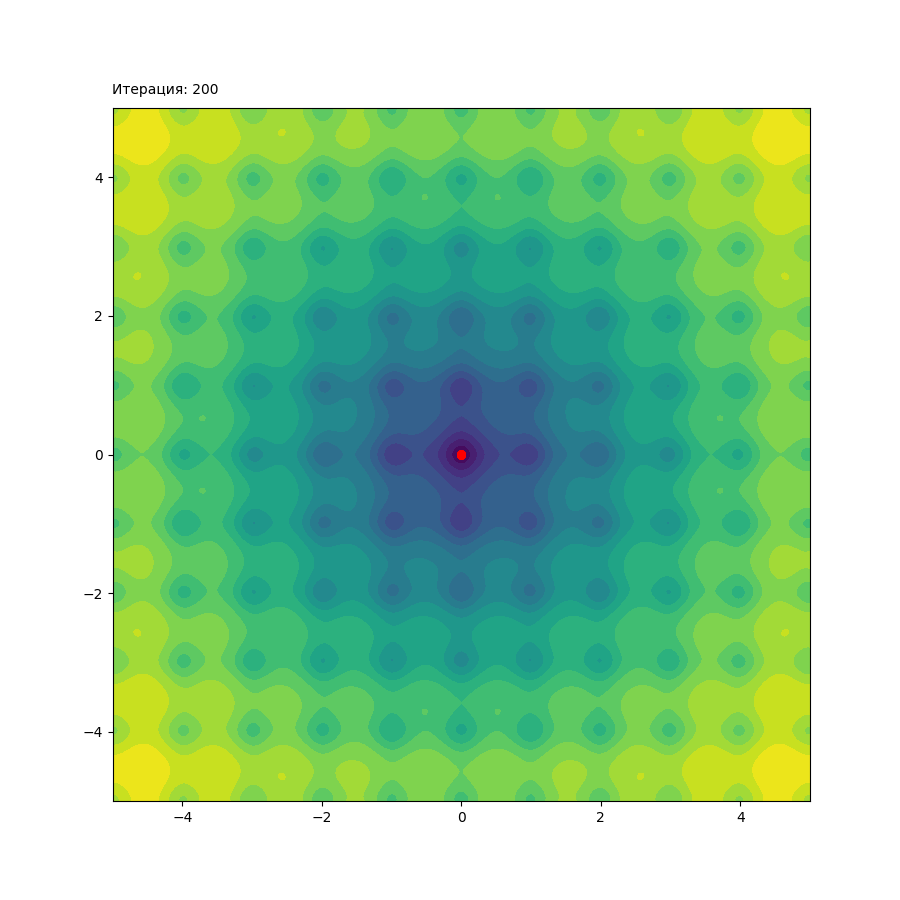

In [5]:
delta = 0.01
x = np.arange(-5, 5, delta)
y = np.arange(-5, 5, delta)
X, Y = np.meshgrid(x, y)
Z = ackley(X, Y)


figA = plt.figure(figsize=(9, 9))
axA = figA.add_subplot()

plt.xlim(-5, 5)
plt.ylim(-5, 5)

axA.contourf(X, Y, Z, levels = 20)

scat = axA.scatter([], [], c='red', linewidths=0.1)
temp = axA.text(-5, 5.2, '')
    
def animate(i):
    temp.set_text('Итерация: ' + str(i))
    scat.set_offsets(particles[i])
    
anim1 = FuncAnimation(figA, animate, frames=len(particles), interval=50, repeat=False)

### Функция Химмельблау

In [6]:
func = himel
area = (-5, 5)
particles = 20
itr = 200
w = 0.6
fp = 2
fg = 2

pso = PSO(func, area, particles, itr, w, fp, fg)
pso.execute()

particles = [list(map(lambda x: list(x), parts)) for parts in pso.particlesHist]
bests = [func(*best) for best in pso.swarmBestHist]
best = pso.swarmBest

[[-3.69092454 -1.60651241]
 [-2.61981941 -3.33372139]
 [ 5.57972729 -4.69726032]
 [-0.39321151  5.89308704]
 [-8.47059466 -1.22338934]
 [ 9.64517047  8.95850983]
 [-6.30045239  3.33323179]
 [ 4.13585239 -4.15478898]
 [ 4.97140099 -5.18471201]
 [-1.45685502  3.15603969]
 [-5.24461625 -2.01057123]
 [-8.33692702  6.57571885]
 [-6.17253961 -8.5993957 ]
 [-2.92694797  8.5163364 ]
 [ 0.19757004  6.02081083]
 [ 2.91710293  2.26151865]
 [ 8.67100463  4.14953739]
 [-0.95585604 -3.5307286 ]
 [-8.81832772 -1.30784598]
 [-6.66215442 -4.7919677 ]]


In [7]:
print(f'Минимум функции: 0.0')
print(f'\nТочки минимумов:')
print('f(3,2) = 0')
print('f(-2,805118, 3,131312) = 0')
print('f(-3,779310, -3,283186) = 0')
print('f(3,584428, -1,848126) = 0')
print(f'\nНачальные координыты частиц:')
for p in particles[0]:
    print(p)
print('\n\n')

for i in range(0, 41):
    print(f'Итерация: {i} Значение функции: {round(bests[i], 3)}')

print(f'\n\nКонечные координыты частиц:\n')
for p in particles[-1]:
    print(p)
print(f'\n\nНайденный минимум: {round(func(*best), 9)}')

Минимум функции: 0.0

Точки минимумов:
f(3,2) = 0
f(-2,805118, 3,131312) = 0
f(-3,779310, -3,283186) = 0
f(3,584428, -1,848126) = 0

Начальные координыты частиц:
[0.32841931357137355, -2.1144672461343683]
[3.0848512186548565, -0.027449381301337894]
[-3.9741404191407192, -2.107429828312929]
[-1.7977723619108454, -4.588612034017583]
[1.2532353426508545, -0.43357921592251625]
[1.8527143283836898, 0.9157372531471548]
[3.671922680460437, 4.553291051696689]
[-1.3934701420601883, -0.5175717341168031]
[-0.5311024073221642, -3.977810486880442]
[-3.1454710343773504, 4.872413001129615]
[2.4551409445899752, -4.770628151294055]
[-3.354490424681378, 1.7847122073955566]
[-0.4404227759037296, 4.373231705353543]
[-0.7955122623607656, 1.9724883331242058]
[-0.6100324780034256, -4.3621685845138565]
[4.7168086023396985, -2.305684476597205]
[-2.4836765478688525, 4.630893243986975]
[-0.29673180622573625, -1.8673906383133998]
[1.447825707565709, 1.1483737217732948]
[-0.5173127056896032, 3.977565871229176]





<IPython.core.display.Javascript object>


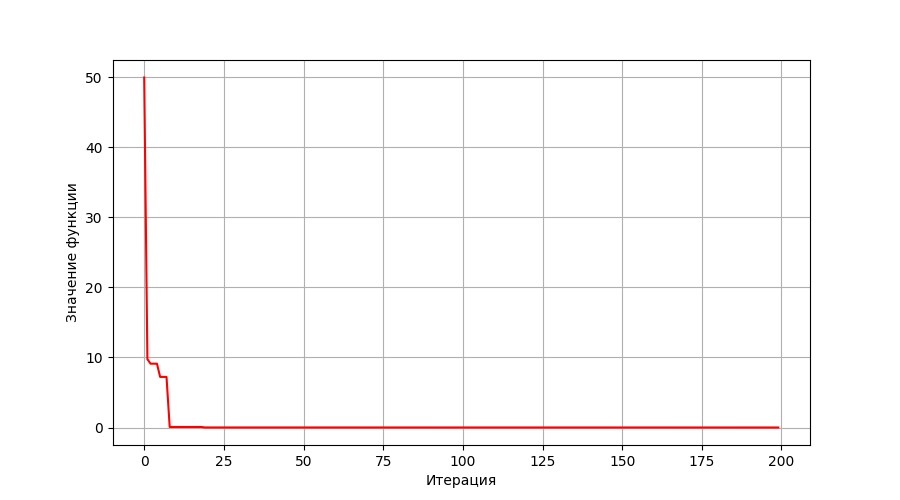

In [8]:
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot()

ax.plot(bests, color='red', linewidth=1.5)
ax.set_xlabel('Итерация')
ax.set_ylabel('Значение функции')
ax.grid()

<IPython.core.display.Javascript object>


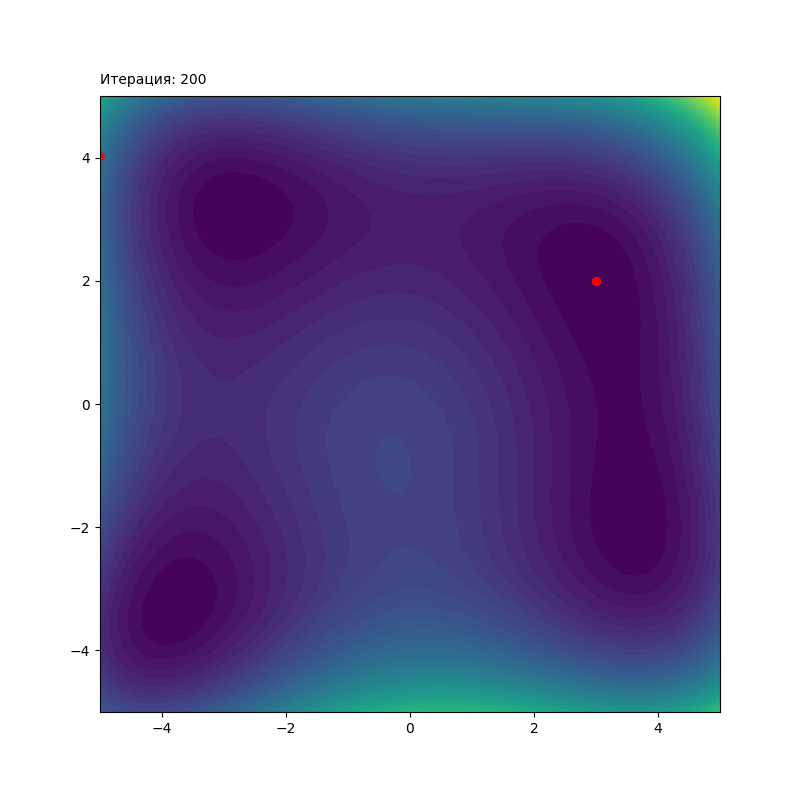

In [9]:
delta = 0.01
x = np.arange(-5, 5, delta)
y = np.arange(-5, 5, delta)
X, Y = np.meshgrid(x, y)
Z = himel(X, Y)


figA = plt.figure(figsize=(8, 8))
axA = figA.add_subplot()

plt.xlim(-5, 5)
plt.ylim(-5, 5)

axA.contourf(X, Y, Z, levels = 50)

scat = axA.scatter([], [], c='red', linewidths=0.1)
temp = axA.text(-5, 5.2, '')

def animate(i):
    temp.set_text('Итерация: ' + str(i))
    scat.set_offsets(particles[i])
    
anim = FuncAnimation(figA, animate, frames=len(particles), interval=50, repeat=False)

### Табличная функция Хольдера

[[-12.32836071  -7.23984089]
 [ 15.64028952 -11.11775757]
 [  6.67474558  -8.71127654]
 [ -0.78042735  12.57279225]
 [ -7.31201361  -1.09865656]
 [-11.37574814  -2.0024783 ]
 [ -2.2827696  -13.82655297]
 [ 17.47355357 -17.39921299]
 [ 10.28495667 -14.39719181]
 [-11.44134062 -15.31331837]
 [-12.65449127 -10.82467638]
 [-18.86670744 -15.43441728]
 [-15.16980169   3.08612508]
 [ -9.25958799  16.30794024]
 [ -5.99421461   8.59481468]
 [ 19.76342109 -19.32897246]
 [-14.04447022   5.31292029]
 [-11.16894125 -19.39652977]
 [  0.75315713 -14.12898072]
 [ -8.67378384 -10.77729879]]
Минимум функции: -19.2085
Найденный минимум: -18.020716634


<IPython.core.display.Javascript object>


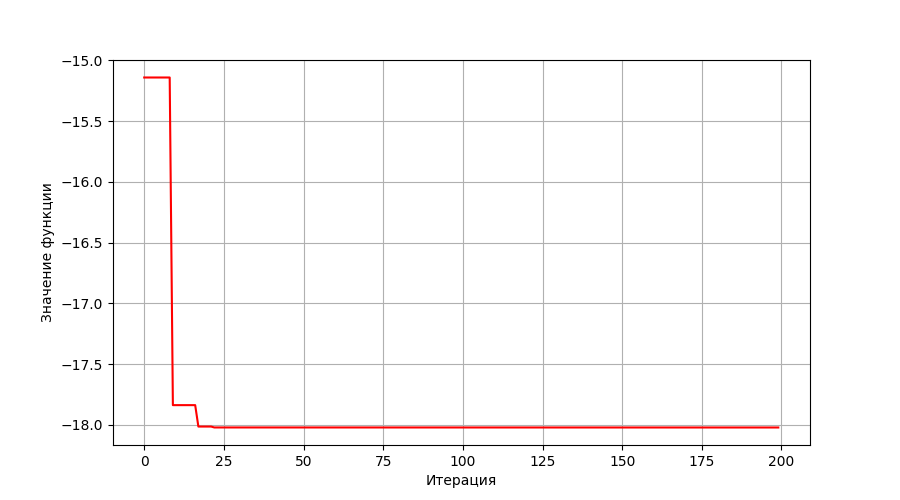

In [10]:
func = holder
area = (-10, 10)
particles = 20
itr = 200
w = 0.6
fp = 2
fg = 2

pso = PSO(func, area, particles, itr, w, fp, fg)
pso.execute()

particles = [list(map(lambda x: list(x), parts)) for parts in pso.particlesHist]
bests = [func(*best) for best in pso.swarmBestHist]
best = pso.swarmBest

print(f'Минимум функции: -19.2085\nНайденный минимум: {round(func(*best), 9)}')

fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot()

ax.plot(bests, color='red', linewidth=1.5)
ax.set_xlabel('Итерация')
ax.set_ylabel('Значение функции')
ax.grid()

<IPython.core.display.Javascript object>


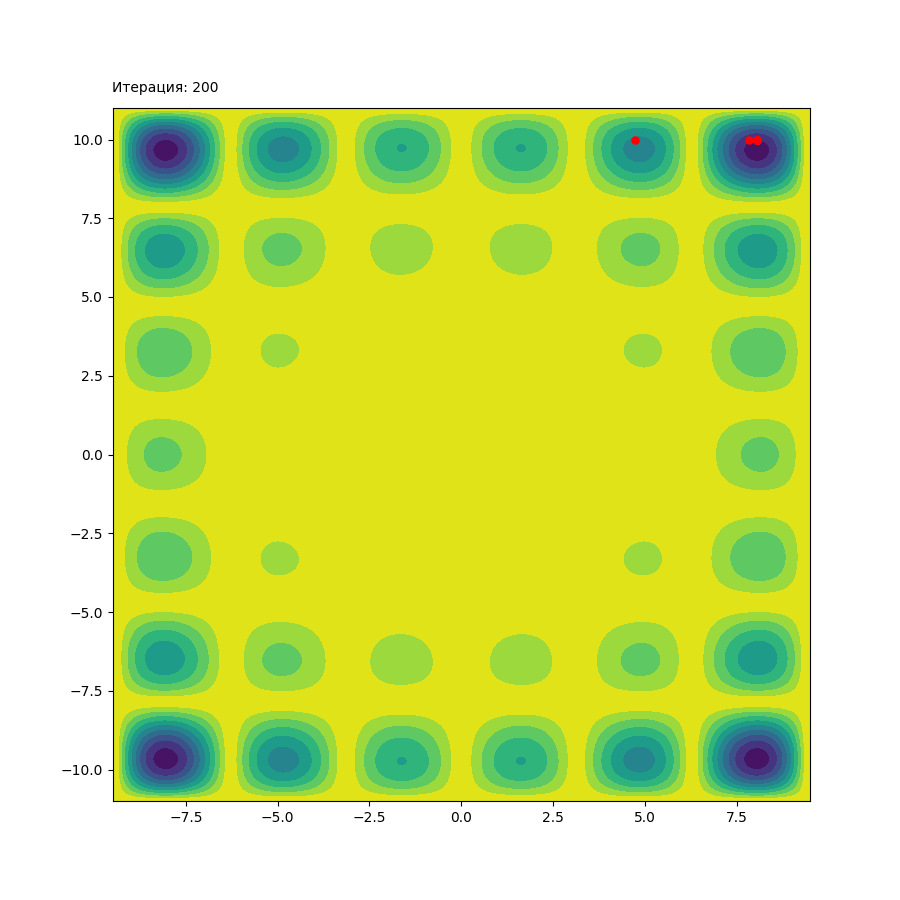

In [11]:
delta = 0.01
x = np.arange(-9.5, 9.5, delta)
y = np.arange(-11, 11, delta)
X, Y = np.meshgrid(x, y)
Z = holder(X, Y)


figA = plt.figure(figsize=(9, 9))
axA = figA.add_subplot()

plt.xlim(-9.5, 9.5)
plt.ylim(-11, 11)

axA.contourf(X, Y, Z, levels = 10)

scat = axA.scatter([], [], c='red', linewidths=0.1)
temp = axA.text(-9.5, 11.5, '')

def animate(i):
    temp.set_text('Итерация: ' + str(i))
    scat.set_offsets(particles[i])
    
anim = FuncAnimation(figA, animate, frames=len(particles), interval=50, repeat=False)

### Функция "крест на подносе"

[[ -7.83519418  -7.31323786]
 [ -7.24616558 -14.35954772]
 [ 11.08916873   5.50923223]
 [  0.81064633   2.45758632]
 [  1.27984064 -12.68089902]
 [ 16.13053459  11.37919729]
 [ 16.12084602   1.10888999]
 [-11.29247585  -0.72299937]
 [ 17.97891387  -0.16990865]
 [ 16.95684303   7.97531566]
 [  0.79585416  -4.77469242]
 [-16.16678674   7.44968968]
 [ -0.34551681  16.86303529]
 [  5.66236126   0.18723753]
 [ -6.76633975  -4.33471556]
 [ 16.00673398 -12.19424461]
 [  0.81953675  16.51685612]
 [  3.12370545  -2.90359423]
 [ -3.51018602  14.36392174]
 [-11.55921476   6.19696441]]
Минимум функции: -2.06261
Найденный минимум: -1.996665151


<IPython.core.display.Javascript object>


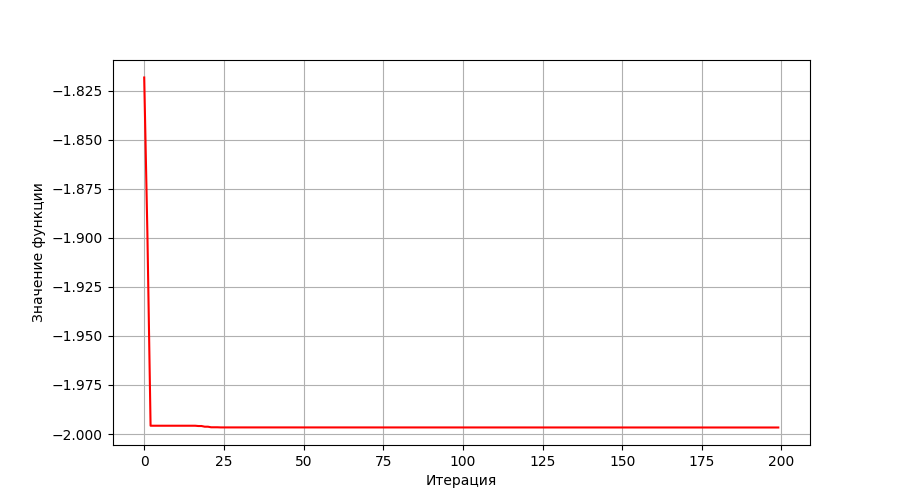

In [12]:
func = crossInTray
area = (-9, 9)
particles = 20
itr = 200
w = 0.6
fp = 2
fg = 2

pso = PSO(func, area, particles, itr, w, fp, fg)
pso.execute()

particles = [list(map(lambda x: list(x), parts)) for parts in pso.particlesHist]
bests = [func(*best) for best in pso.swarmBestHist]
best = pso.swarmBest

print(f'Минимум функции: -2.06261\nНайденный минимум: {round(func(*best), 9)}')

fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot()

ax.plot(bests, color='red', linewidth=1.5)
ax.set_xlabel('Итерация')
ax.set_ylabel('Значение функции')
ax.grid()

<IPython.core.display.Javascript object>


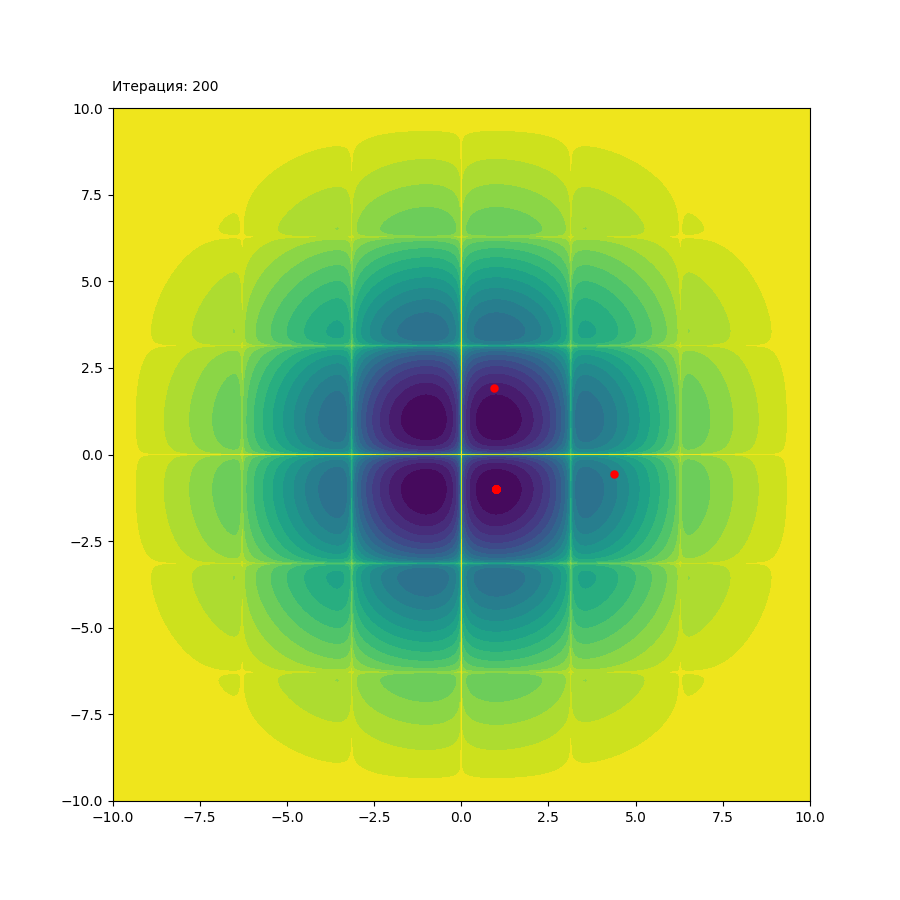

In [19]:
delta = 0.01
x = np.arange(-10, 10, delta)
y = np.arange(-10, 10, delta)
X, Y = np.meshgrid(x, y)
Z = crossInTray(X, Y)

figA = plt.figure(figsize=(9, 9))
axA = figA.add_subplot()

plt.xlim(-10, 10)
plt.ylim(-10, 10)

axA.contourf(X, Y, Z, levels = 20)

scat = axA.scatter([], [], c='red', linewidths=0.1)
temp = axA.text(-10, 10.5, '')

def animate(i):
    temp.set_text('Итерация: ' + str(i))
    scat.set_offsets(particles[i])
    
anim = FuncAnimation(figA, animate, frames=len(particles), interval=50, repeat=False)

In [ ]:
%matplotlib notebook
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# Исследуемая функция
def himel(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 -7)**2


# Роевой алгоритм
class PSO:
    
    def __init__(self, func, area = (-5, 5), particles = 20, itr = 100, w = 1, fp = 1, fg = 1):
        
        self.w = w             # Коэффициент инерции
        self.fp = fp           # Коэффициент ускорения
        self.fg = fg           # Коэффициент ускорения
        self.itr = itr         # Количество итераций
        self.func = func       # Оптимизируемая функция
        self.area = area       # Область определения
        self.partQ = particles # Количество частиц
        
        self.particles = np.random.uniform(area[0], area[1], (self.partQ, 2)) # Координаты частиц
        
        self.particlesBest = self.particles.copy() # Координаты частиц
        
        self.swarmBest = list(area) # Лучшая позиция
                
        self.velocity = np.random.uniform(-abs(area[1] - area[0]), abs(area[1] - area[0]), (self.partQ, 2)) # Векторы ускорений
        
        self.particlesHist = [self.particles.copy(), ] # Позиции чаcтиц на каждой итерации
        self.swarmBestHist = [] # Лучшая текущая позиция для каждой итерации
        
    
    def execute(self):
        
        for i in range(itr):
            for pI, partical in enumerate(self.particles):
                for d in range(2):
                    
                    # Получение рандомных значений
                    rp, rg = np.random.uniform(0, 1, 2)
                    
                    # Изменение укорения
                    self.velocity[pI][d] = self.w*self.velocity[pI][d] \
                                            + self.fp*rp*(self.particlesBest[pI][d]-partical[d]) \
                                            + self.fg*rg*(self.swarmBest[d]-partical[d])
                    
                    # Изменение координаты частицы
                    partical[d] += self.velocity[pI][d]
                    
                    # Проверка нахождения частицы в пределах исследуемой области
                    if partical[d] > self.area[1]:
                        partical[d] = self.area[1]
                    elif partical[d] < self.area[0]:
                        partical[d] = self.area[0]
                
                # Обновление лучшего положения для каждой частицы
                if self.func(*partical) < self.func(*self.particlesBest[pI]):
                    self.particlesBest[pI] = partical
                    
                    # Обновление лучшего положения
                    if self.func(*self.particlesBest[pI]) < self.func(*self.swarmBest):
                        self.swarmBest = self.particlesBest[pI]
            
            # Добавление нового положения частиц и текужего  лучшего положения
            self.particlesHist.append(self.particles.copy())
            self.swarmBestHist.append(self.swarmBest.copy())
            
            
# Инициализация параметров
func = himel
area = (-5, 5)
particles = 20
itr = 200
w = 0.6
fp = 2
fg = 2

# Запуск алгоритма
pso = PSO(func, area, particles, itr, w, fp, fg)
pso.execute()

# Выходные данные
particles = [list(map(lambda x: list(x), parts)) for parts in pso.particlesHist]
bests = [func(*best) for best in pso.swarmBestHist]
best = pso.swarmBest


# Вывод результатов
print(f'Минимум функции: 0.0')
print(f'\nТочки минимумов:')
print('f(3,2) = 0')
print('f(-2,805118, 3,131312) = 0')
print('f(-3,779310, -3,283186) = 0')
print('f(3,584428, -1,848126) = 0')
print(f'\nНачальные координыты частиц:')
for p in particles[0]:
    print(p)
print('\n\n')

for i in range(0, 41):
    print(f'Итерация: {i} Значение функции: {round(bests[i], 3)}')

print(f'\n\nКонечные координыты частиц:\n')
for p in particles[-1]:
    print(p)
print(f'\n\nНайденный минимум: {round(func(*best), 9)}')


# График
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot()

ax.plot(bests, color='red', linewidth=1.5)
ax.set_xlabel('Итерация')
ax.set_ylabel('Значение функции')
ax.grid()


# Анимация
delta = 0.01
x = np.arange(-5, 5, delta)
y = np.arange(-5, 5, delta)
X, Y = np.meshgrid(x, y)
Z = himel(X, Y)


figA = plt.figure(figsize=(8, 8))
axA = figA.add_subplot()

plt.xlim(-5, 5)
plt.ylim(-5, 5)

axA.contourf(X, Y, Z, levels = 50)

scat = axA.scatter([], [], c='red', linewidths=0.1)
temp = axA.text(-5, 5.2, '')

def animate(i):
    temp.set_text('Итерация: ' + str(i))
    scat.set_offsets(particles[i])
    
anim = FuncAnimation(figA, animate, frames=len(particles), interval=50, repeat=False)